In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

l'obiettivo è fare un algoritmo che dato il condumo di un'auto ci dia le emissioni

In [3]:
dati=pd.read_csv("./Fuel_Consumption_2000-2022.csv")
dati

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 KM),COMB (L/100 KM),COMB (MPG),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,VOLVO,XC40 T5 AWD,SUV: SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,VOLVO,XC60 B5 AWD,SUV: SMALL,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,VOLVO,XC60 B6 AWD,SUV: SMALL,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,VOLVO,XC90 T5 AWD,SUV: STANDARD,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


In [7]:
dati_np=dati[dati["FUEL"]=="X"][["FUEL CONSUMPTION","EMISSIONS"]].values
dati_np

array([[  9.2, 186. ],
       [  8.5, 175. ],
       [ 10. , 198. ],
       ...,
       [ 10.6, 222. ],
       [ 11. , 229. ],
       [ 10.7, 217. ]])

non facciamo lo split in train e test, questo serve raramente in quanto grazie all'analisi grafica e a r^2 riusciamo a capire la qualità

#### usiamo tutti i dati per il training

In [11]:
X=dati_np[:,0]
Y=dati_np[:,1]

In [12]:
X

array([ 9.2,  8.5, 10. , ..., 10.6, 11. , 10.7])

In [13]:
Y

array([186., 175., 198., ..., 222., 229., 217.])

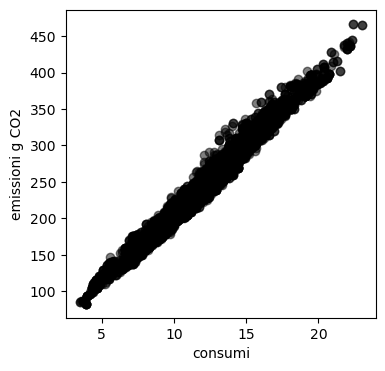

In [17]:
fig,ax=plt.subplots(figsize=(4,4))
ax.scatter(X,Y,c="k",alpha=0.5)
ax.set_xlabel("consumi")
ax.set_ylabel("emissioni g CO2")
plt.show()

la regressione è fattibile in quanto questo numero di punti sembra approssimabile da una retta

In [18]:
#dobbiamo normalizzare i dati

x_norm=(X-np.mean(X))/np.std(X)
y_norm=(Y-np.mean(Y))/np.std(Y)

In [19]:
x_norm

array([-0.88597673, -1.11580616, -0.62331452, ..., -0.42631786,
       -0.29498675, -0.39348508])

In [20]:
y_norm

array([-0.91497329, -1.10039273, -0.71269753, ..., -0.30814601,
       -0.19015182, -0.39242758])

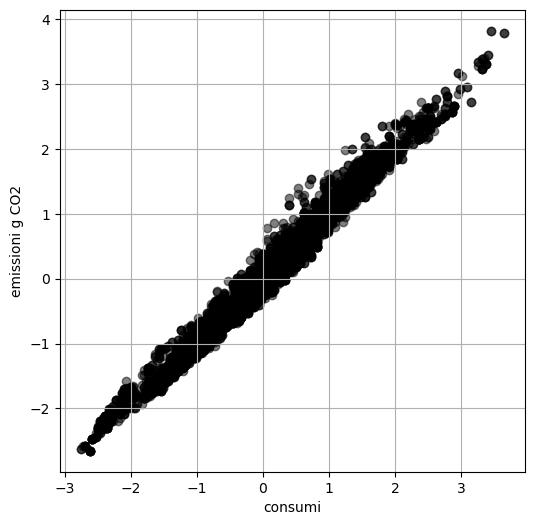

In [23]:
fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(x_norm,y_norm,c="k",alpha=0.5)
ax.set_xlabel("consumi")
ax.set_ylabel("emissioni g CO2")
ax.grid()
plt.show()

In [27]:
regressione=LinearRegression()
regressione.fit(x_norm,y_norm)#nel mondo del machine learning si da lo stesso nome dei metodi a tutte le classi, mi addestra la macchina


ValueError: Expected 2D array, got 1D array instead:
array=[-0.88597673 -1.11580616 -0.62331452 ... -0.42631786 -0.29498675
 -0.39348508].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

normalmente ha una variabile targhet di numeri o lettere, x_norm nonrmalmente è una matrice non un'array, 

lui vuole una matrice, con 1 colonna in quanto abbiamo una sola variabile

In [28]:
x_norm[:,np.newaxis]#->diventa un array colonna

array([[-0.88597673],
       [-1.11580616],
       [-0.62331452],
       ...,
       [-0.42631786],
       [-0.29498675],
       [-0.39348508]])

la retta che andremo a ottenere passo per l'origine

ogni volta che normalizziamo la retta passa per l'origine-> termine noto nullo

In [29]:
regressione=LinearRegression()
regressione.fit(x_norm[:,np.newaxis],y_norm)#nel mondo del machine learning si da lo stesso nome dei metodi a tutte le classi, mi addestra la macchina


LinearRegression()

In [32]:
print(f"R^2 vale {regressione.score(x_norm[:,np.newaxis],y_norm):.2f}")

R^2 vale 0.98


In [35]:
coef_angolare=regressione.coef_
coef_angolare

array([0.98990009])

si possono avere + coef angolari in quanto siamo su un iperpiano ma solo un termine noto

In [36]:
term_noto=regressione.intercept_
term_noto

1.9539097327006398e-16

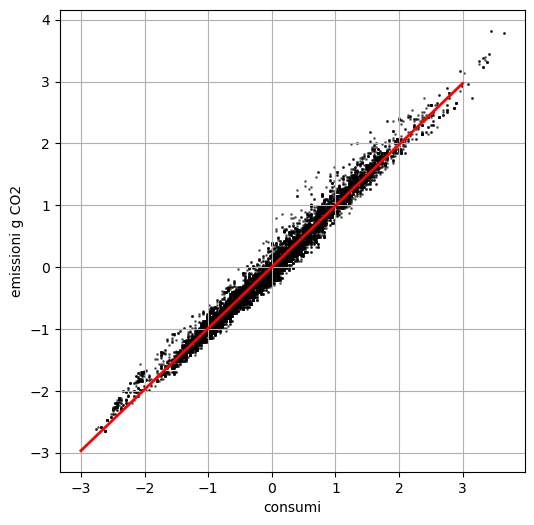

In [39]:
array_x=np.linspace(-3,3,100)
array_y=coef_angolare*array_x+term_noto

fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(x_norm,y_norm,c="k",s=1.,alpha=0.5)
ax.plot(array_x,array_y,color="r",linewidth=2.)
ax.set_xlabel("consumi")
ax.set_ylabel("emissioni g CO2")
ax.grid()
plt.show()

la retta che abbiamo trovato è nel pano delle features normalizzate
devo prrima normalizzare il consumo

In [40]:
consumo=6.
consumo_norm=(consumo-np.mean(X))/np.std(X)
consumo_norm

-1.9366255793192015

In [43]:
emissioni_norm=coef_angolare*consumo_norm+term_noto
emissioni_norm

array([-1.91706583])

In [44]:
#alternativa al codice sopra
regressione.predict([[consumo_norm]])

array([-1.91706583])

devo far l'operazione inversa della normalizzazione per capire il valore reale, moltiplico per deviazione standard e aggiungo valor medio

In [45]:
emissioni_norm*np.std(Y)+np.mean(Y)

array([126.55090644])

### REGRSSSIONI SENZA NORMALIZZARE

In [49]:
regressione_no_norm=LinearRegression()
regressione_no_norm.fit(X[:,np.newaxis],Y)

LinearRegression()

In [51]:
print(f"R^2 vale {regressione_no_norm.score(X[:,np.newaxis],Y):.2f}")

R^2 vale 0.98


In [55]:
coef_angolare_no_norm=regressione_no_norm.coef_[0]
coef_angolare_no_norm

19.281303056689087

In [56]:
term_noto_no_norm=regressione_no_norm.intercept_
term_noto_no_norm

10.86308809722675

a partire dai consumi posso dedurre che è=19.28*+10.86

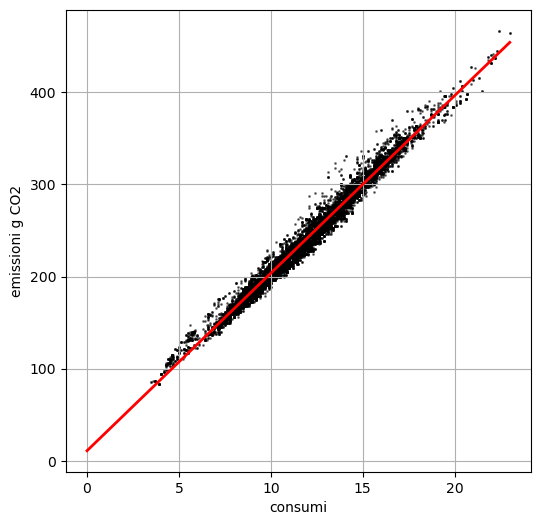

In [58]:
array_x=np.linspace(0,23,100)
array_y=coef_angolare_no_norm*array_x+term_noto_no_norm

fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(X,Y,c="k",s=1.,alpha=0.5)
ax.plot(array_x,array_y,color="r",linewidth=2.)
ax.set_xlabel("consumi")
ax.set_ylabel("emissioni g CO2")
ax.grid()
plt.show()